In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark
from pyspark.sql import *

/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_PATH = "../../data/"

In [3]:
spark = SparkSession.builder.getOrCreate()

In [6]:
tones_df = spark.read.parquet(DATA_PATH  + "tone_mean_count_5themes.parquet")

In [7]:
tones = tones_df.toPandas()

In [8]:
tones.head()

,day,month,year,tone_mean
0,19.0,8.0,2017.0,-1.830114
1,7.0,7.0,2017.0,-2.239015
2,26.0,8.0,2016.0,-2.204316
3,24.0,8.0,2016.0,-2.372774
4,24.0,12.0,2016.0,-1.952390


In [9]:
tones['datetime'] = pd.to_datetime(tones[['year','month','day']])

In [10]:
tones = tones.sort_values(by='datetime') 

In [11]:
tones.head()

,day,month,year,tone_mean,datetime
902,18.0,2.0,2015.0,-2.306939,2015-02-18
508,19.0,2.0,2015.0,-1.986621,2015-02-19
667,20.0,2.0,2015.0,-2.275454,2015-02-20
620,21.0,2.0,2015.0,-2.116303,2015-02-21
73,22.0,2.0,2015.0,-1.824022,2015-02-22


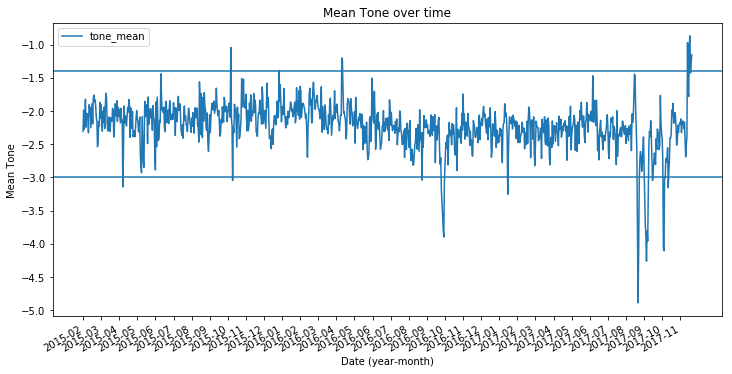

In [20]:
tones.plot('datetime','tone_mean',figsize=(12,6))
# display a label every month
ticks = tones.datetime.values[0::30]
labels = [str(t).split('-')[0] + "-" + str(t).split('-')[1] for t in ticks]
plt.xticks(ticks, labels)
plt.xlabel("Date (year-month)")
plt.ylabel("Mean Tone")
plt.title("Mean Tone over time")
plt.axhline(y=-1.4)
plt.axhline(y=-3)
plt.show()

In [22]:
tones[tones['tone_mean']>-1.4]

,day,month,year,tone_mean,datetime
897,21.0,10.0,2015.0,-1.043949,2015-10-21
240,9.0,1.0,2016.0,-1.392091,2016-01-09
534,22.0,4.0,2016.0,-1.200882,2016-04-22
94,23.0,4.0,2016.0,-1.234557,2016-04-23
692,16.0,11.0,2017.0,-0.972146,2017-11-16
898,19.0,11.0,2017.0,-0.977021,2017-11-19
779,20.0,11.0,2017.0,-0.869092,2017-11-20
604,22.0,11.0,2017.0,-1.257517,2017-11-22
121,23.0,11.0,2017.0,-1.155488,2017-11-23
980,NaN,NaN,NaN,-0.790680,NaT


In [21]:
tones[tones['tone_mean']<-3]

,day,month,year,tone_mean,datetime
551,25.0,4.0,2015.0,-3.144064,2015-04-25
23,24.0,10.0,2015.0,-3.046693,2015-10-24
726,2.0,9.0,2016.0,-3.041629,2016-09-02
643,4.0,10.0,2016.0,-3.197042,2016-10-04
923,5.0,10.0,2016.0,-3.372053,2016-10-05
841,6.0,10.0,2016.0,-3.570926,2016-10-06
267,7.0,10.0,2016.0,-3.768638,2016-10-07
853,8.0,10.0,2016.0,-3.898859,2016-10-08
354,9.0,10.0,2016.0,-3.067066,2016-10-09
928,22.0,1.0,2017.0,-3.255250,2017-01-22
